<center>Universidade Federal de Viçosa</center>
<center>Inteligência Artificial e Computacional</center>
<center>ELT578 - Análise de Imagens e Visão Computacional</center>
<center>TURMA 2022/2</center>

**<center>AULA PRÁTICA 4: Técnicas de Limiarização, Segmentação e Descritores de Objeto</center>**
<center>Aluno: Michel Batistin Fiorio</center>

Em visão computacional, a segmentação é a parte do processamento de imagens que utiliza de técnicas para dividir imagens em diferentes regiões (conjunto de pixels) ou objetos, com o objetivo de simplificar ou mudar características da imagem para facilitar a sua análise no processo posterior. A segmentação é tipicamente usada para localizar objetos e detectar formas em imagens. Algumas das técnicas utilizadas é a limiarização, detecção de bordas, clusterização e watershed. Aplicaremos agumas dessas técnicas nessa atividade prática.

In [110]:
# Permissão para acessar o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
# Importando bibliotecas
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
from scipy import stats
from skimage import io, img_as_uint, data, filters, measure, morphology
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage.measure import label, regionprops_table

### Técnicas de Limiarização
A limiarização é uma técnica simples e eficiente que utiliza um valor referência de intensidade do pixel como limite separador (threshold) para a divisão do espectro de cores da imagem, criando uma imagem binária (duas cores). A limiarização pode ser global, onde apenas um único valor de limiar é utilizado para a imagem inteira e funciona especialmente bem para casos de imagens com histogramas bimodais, aqueles onde há o aparecimento de dois picos de frequência que se destacam. Há também a limiarização adaptativa, onde determina-se valores de limiares diferentes para diferentes regiões da imagem, o que dá melhores resultados para imagens iluminação variável.




#### Limiarização Global

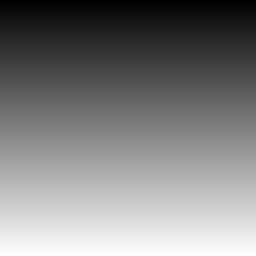

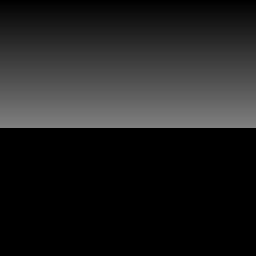

In [112]:
# Criando uma imagem 256x256 onde cada linha tem um valor de pixel variando de 1 a 256
I = np.zeros((256,256), dtype='uint8')
for i in range(0,256):
  I[i,:] = i

# Mostrando a imagem
cv2_imshow(I)

# Aplicando limiarização global na imagem com diferentes regras para os bits acima do limiar
lim, I1 = cv2.threshold(I,127,200,cv2.THRESH_BINARY) 
lim, I2 = cv2.threshold(I,127,200,cv2.THRESH_BINARY_INV)
lim, I3 = cv2.threshold(I,127,200,cv2.THRESH_TRUNC)
lim, I4 = cv2.threshold(I,127,200,cv2.THRESH_TOZERO)
lim, I5 = cv2.threshold(I,127,200,cv2.THRESH_TOZERO_INV)

# Mostrando a imagem limiarizada
cv2_imshow(I5)

#### Limiarização adaptativa

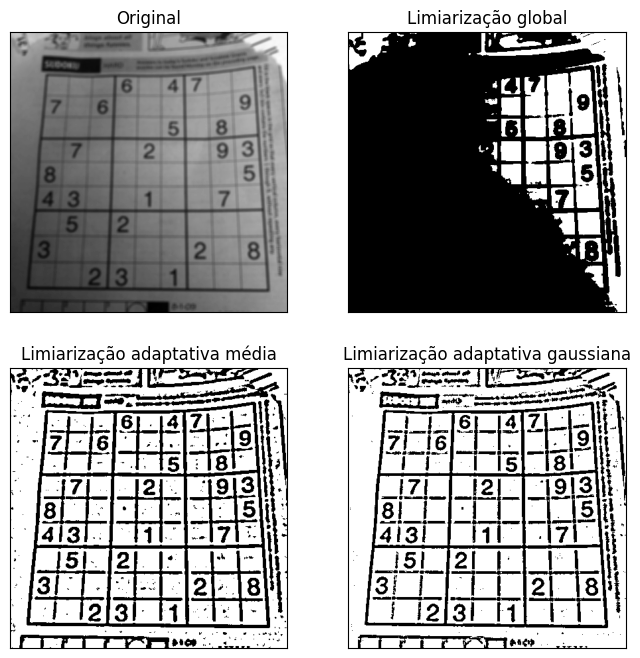

In [113]:
# Carregando imagem do google drive
sudoku = cv2.imread('/content/drive/MyDrive/sudoku.jpg', cv2.IMREAD_GRAYSCALE)
# Aplicando suavização da imagem
sudoku = cv2.blur(sudoku,[5,5])

# Aplicando a limiarização global
lim, sd1 = cv2.threshold(sudoku,127,255,cv2.THRESH_BINARY)
# Limiarização adaptativa com método média
sd2 = cv2.adaptiveThreshold(sudoku,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
# Limiarização adaptativa com método gaussiano
sd3 = cv2.adaptiveThreshold(sudoku,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

# Mostrando os resultados
titulos = ['Original', 'Limiarização global',
            'Limiarização adaptativa média', 'Limiarização adaptativa gaussiana']
imagens = [sudoku, sd1, sd2, sd3]
plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(imagens[i],'gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### Limiarização de Otsu
Determina o valor ideal de um threshold que separe os elementos do fundo e da frente da imagem em dois clusters, atribuindo a cor branca ou preta para cada um deles. Funciona bem para imagens com histogramas bimodais.

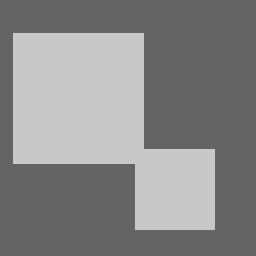

Limiar ótimo obtido pelo algoritmo de Otsu =  100.0


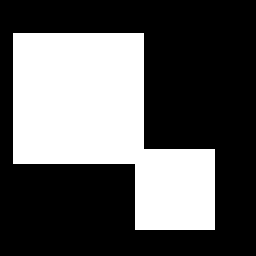

In [114]:
# Criando uma imagem 256x256 que possui dois quadrados
B = np.zeros((256,256), dtype='uint8')+100
B[33:164,13:144]=200
B[149:230,135:215]=200

# Mostrando imagem
cv2_imshow(B)

# Aplicando binarização global de Otsu
lim, B2 = cv2.threshold(B,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print ('Limiar ótimo obtido pelo algoritmo de Otsu = ', lim)
cv2_imshow(B2)

#### Limiarização de uma imagem colorida

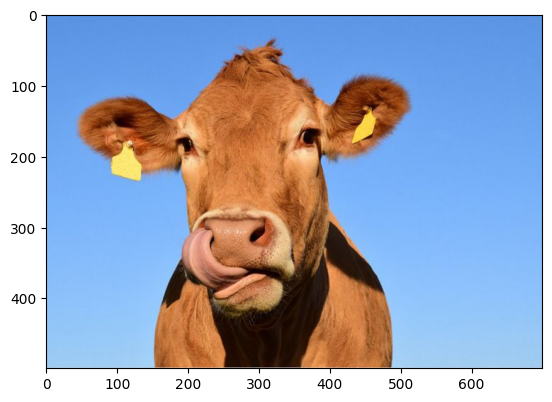

In [115]:
# Carregando imagem
Im = imread('/content/drive/MyDrive/cow.jpg')
# Mostrando imagem
plt.imshow(Im)

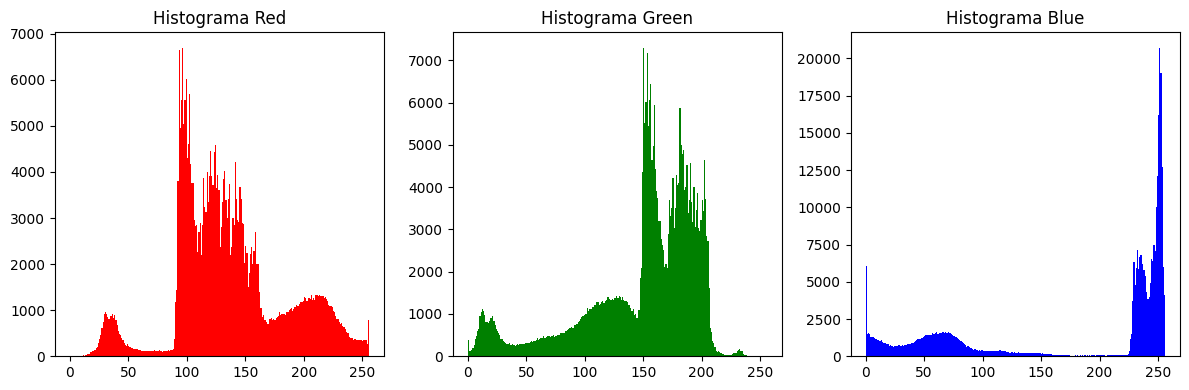

In [116]:
# Criando histograma para os 3 canais de cor da imagem
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
Im_hist_red = plt.hist(Im[:,:,0].flatten(), bins=256, range=[0, 256], facecolor='red')
plt.title('Histograma Red')
plt.subplot(1, 3, 2)
Im_hist_green = plt.hist(Im[:,:,1].flatten(), bins=256, range=[0, 256], facecolor='green')
plt.title('Histograma Green')
plt.subplot(1, 3, 3)
Im_hist_blue = plt.hist(Im[:,:,2].flatten(), bins=256, range=[0, 256], facecolor='blue')
plt.title('Histograma Blue')
plt.tight_layout()
plt.show()

In [117]:
# Obterndo alguns dados da imagem
max_pixel = np.max(np.max(Im, axis=0), axis=0)
min_pixel = np.min(np.min(Im, axis=0), axis=0)
mean_pixel = np.mean(np.mean(Im, axis=0), axis=0)
median_pixel = np.median(np.median(Im, axis=0), axis=0)
mode_pixel = stats.mode(stats.mode(Im)[0].squeeze())[0].squeeze()

print(Im.shape)
print(min_pixel)
print(max_pixel)
print(mean_pixel)
print(median_pixel)
print(mode_pixel)

(499, 700, 3)
[0 0 0]
[255 246 255]
[136.06972803 148.05659032 175.36897223]
[127. 175. 245.]
[ 96 150 252]


<ipython-input-117-8f4609341ef6>:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_pixel = stats.mode(stats.mode(Im)[0].squeeze())[0].squeeze()


In [118]:
# Obtendo a matriz de cada canal de cor da imagem
red = Im[:,:,0]
green = Im[:,:,1]
blue = Im[:,:,2]

In [119]:
# Definindo para cada canal de cor os valores de pixel a serem considerados limiares para a identificação da vaca
# Tal informação é obtida através da avaliação do resultado do histograma das cores
# Para o histograma da cor azul, por exemplo, vemos que a vaca está na faixa de 0 a 200. 
# Acima de 200 há um pico grande de frequencia que indica a parte da imagem que é o céu ao redor do animal.

red_lower = 150
red_upper = 255
green_lower = 0
green_upper = 160
blue_lower = 0
blue_upper = 200
gray_upper = 250
gray_lower = 255

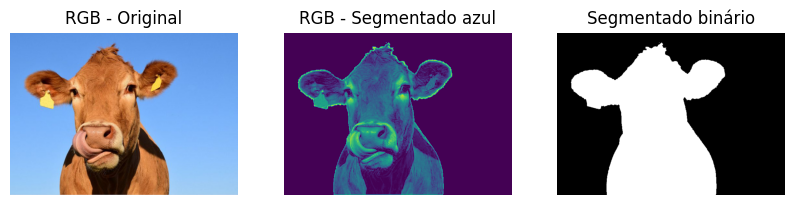

In [120]:
# Aplicando a limiarização no canal de cor blue com os limiares min=0 e max=160, alterando para zero os pixels fora desse intervalo
# Criando a máscara com a regra
mask = (blue >= blue_lower) & (blue <= blue_upper)
# Copiando a matriz do canal blue
bc = blue.copy()
# Aplicando a mascara na matriz blue
bc[np.invert(mask)] = 0

# Mostrando as imagens
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(Im)
plt.title('RGB - Original')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(bc)
plt.title('RGB - Segmentado azul')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('Segmentado binário')
plt.axis('off')
plt.show()

# Salvando no drive a imagem binária
io.imsave('/content/drive/MyDrive/cowbw.jpg', img_as_uint(mask))

#### Descritores do objeto da imagem binarizada (vaca)

In [121]:
# Carregando a imagem do drive
binaryImage = imread(r'/content/drive/MyDrive/cowbw.jpg')

In [122]:
# Obtendo os descritores com uso da biblioteca skimage.measure

# Rotulando as regiões da imagem
rotulos = label(binaryImage)
# Obtendo propriedades da imagem em uma tabela
props = regionprops_table(rotulos, properties=('centroid','perimeter','area','orientation','eccentricity','solidity', 'major_axis_length', 'minor_axis_length'))
# Abrindo a tabela para visualização
pd.DataFrame(props)

,centroid-0,centroid-1,perimeter,area,orientation,eccentricity,solidity,major_axis_length,minor_axis_length
0,32.0,304.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
1,32.0,307.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
2,32.0,310.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
3,32.0,313.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
4,32.0,314.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
5590,495.0,158.0,0.0,1,0.785398,0.0,1.0,0.000000,0.0
5591,497.0,152.0,1.0,3,0.000000,1.0,1.0,3.265986,0.0
5592,497.0,153.0,1.0,3,0.000000,1.0,1.0,3.265986,0.0
5593,497.0,155.0,1.0,3,0.000000,1.0,1.0,3.265986,0.0


In [123]:
# Obtendo descritores com o uso de numpy e opencv

# Transformando a imagem em binária
ret,thresh = cv2.threshold(binaryImage,127,255,0)
# Função para encontrar os contornos em imagem binária
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# Obtendo a maior região obtida da lista dos contornos
cnt = contours[0]
# Calculando a área da região
area = cv2.contourArea(cnt)
# Perímetro da região
perimeter = cv2.arcLength(cnt,True)
# Fator de forma da região
FF = (4*np.pi*area)/(np.power(perimeter,2))
# Compacidade
compacidade = (np.power(perimeter,2))/area
# Excentricidade (retângulo envolvente)
rect = cv2.minAreaRect(cnt)
E_maior = max(rect[1])
E_menor = min(rect[1])
Excentricidade = E_maior/E_menor
# Retangularidade
Retangularidade = area/(E_maior*E_menor)
# Convexidade (contorno convexo)
Fecho = cv2.convexHull(cnt)
Fecho = np.int0(Fecho)
Convexidade = len(Fecho)/perimeter
# Solidez
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area

print('Area:',area)
print('Perímetro:',perimeter)
print('Fator de forma:',FF)
print('Compacidade:',compacidade)
print('Excentricidade:',Excentricidade)
print('Retangularidade',Retangularidade)
print('Convexidade',Convexidade)
print('Solidez:',solidity)

Area: 127416.5
Perímetro: 2149.800199866295
Fator de forma: 0.346449020219499
Compacidade: 36.271918466958056
Excentricidade: 1.0150214592274678
Retangularidade 0.5780675806876027
Convexidade 0.010233509142555794
Solidez: 0.7219678726237357


### Segmentação por detecção de bordas

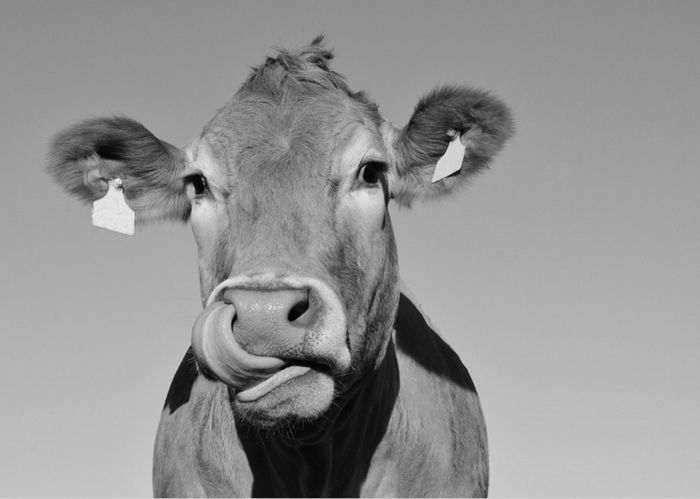

In [124]:
# Carregando a imagem da vaca em tons de cinza
im2 = cv2.imread('/content/drive/MyDrive/cow.jpg',0)
cv2_imshow(im2)

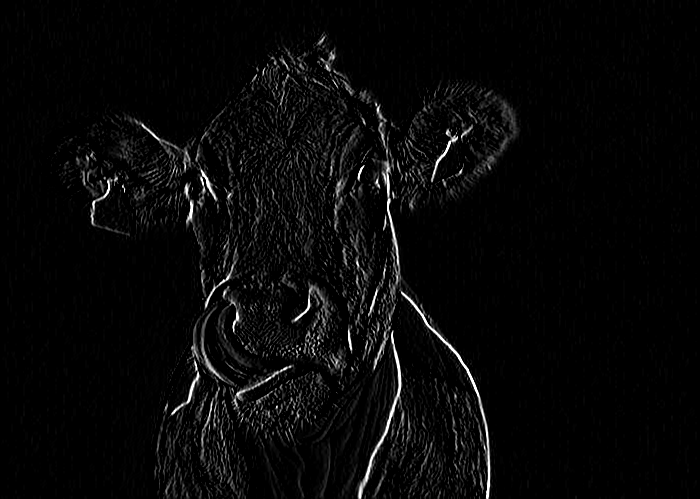

In [125]:
# Aplicando a função Sobel para detecção de bordas

# Aplicando Sobel
cow_sobel = cv2.Sobel(im2,-1,1,0)
# Mostrando resultado da detecção de borda
cv2_imshow(cow_sobel)

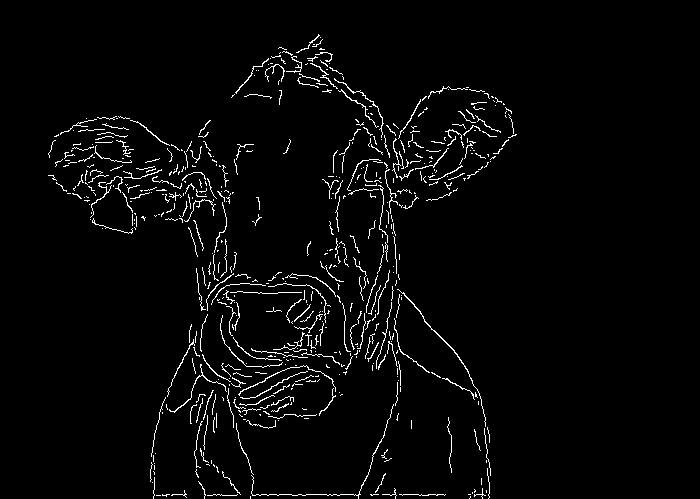

In [126]:
# Aplicando a função Canny para detecção de bordas 

# Suavizando a imagem
im2s = cv2.blur(im2,[7,7])
# Aplicando Canny
cow_canny = cv2.Canny(im2s,50,30)
# Mostrando resultado da detecção de bordas
cv2_imshow(cow_canny)